<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Monte-Carlo-Method" data-toc-modified-id="Monte-Carlo-Method-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Monte Carlo Method</a></span><ul class="toc-item"><li><span><a href="#Estimating-Pi" data-toc-modified-id="Estimating-Pi-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Estimating Pi</a></span></li><li><span><a href="#Estimating-Integral-of-a-Function" data-toc-modified-id="Estimating-Integral-of-a-Function-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Estimating Integral of a Function</a></span></li><li><span><a href="#Find-Integral-Using-Monte-Carlo-Method" data-toc-modified-id="Find-Integral-Using-Monte-Carlo-Method-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Find Integral Using Monte Carlo Method</a></span></li></ul></li></ul></div>

# Monte Carlo Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Estimating Pi

Points inside circle:  78408
Points outside circle: 21591
Estimated pi: 3.136351363513635
Real pi     : 3.141592653589793


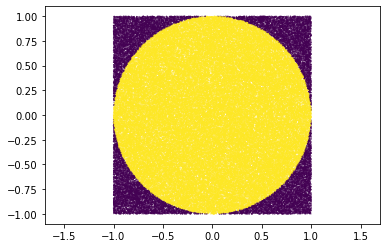

In [282]:
n = 99999
x = np.random.uniform(-1, 1, (2, n))
y = x[0]**2 + x[1]**2 < 1

points_inside_circle = np.sum(y)
points_outside_cricle = n - points_inside_circle
estimated_pi = (points_inside_circle / n) * 4.0

print("Points inside circle: ", points_inside_circle)
print("Points outside circle:", points_outside_cricle)
print("Estimated pi:", estimated_pi)
print("Real pi     :", np.pi)

plt.axis('equal')
_=plt.scatter(x[0], x[1], c=y, s=0.1)

## Estimating Integral of a Function

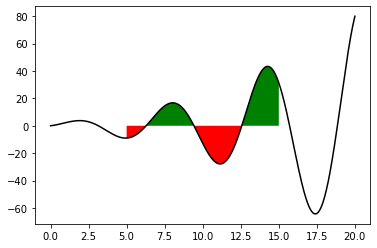

In [328]:
# Objective function
def f(x):
    return np.sin(x)*np.exp(np.sqrt(x))

# Objective: Integrate f(x) for 5<=x<15
a = 5.0
b = 15.0

# Sample x and find y using f
x = np.linspace(0, 20, 1000)
y = f(x)

# Plot the function
x_ab = np.linspace(a, b, 1000)
y_ab = f(x_ab)
x_ = np.hstack([x_ab,[x_ab[-1]+1]])
y_ = np.hstack([y_ab,[0]])
plt.fill_between(x_ab, y_ab, y2, where=y_ab >= 0, facecolor='green', interpolate=True)
plt.fill_between(x_ab, y_ab, y2, where=y_ab < 0, facecolor='red', interpolate=True)
_=plt.plot(x,y, "k")

## Find Integral Using Monte Carlo Method

Estimated Area: 45.98543821441024
Real Area:      44.65078437503798


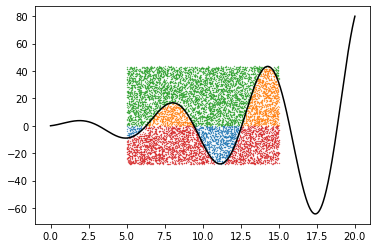

In [339]:
n = 10000

# Find Integral Using Monte Carlo Method
x_rd = np.random.uniform(a, b, n)            # random samples
y_f = f(x_rd)                                # outputs for random samples
y_max, y_min = np.max(y_f), np.min(y_f)      # find min/max boundary for f, because a and b is known
y_mc = np.random.uniform(y_min, y_max, n)    # sample random y points

# Idea:
# (*) if y_mc > y_f then the random point is above the function, it must be below 0 to be accepted
# (*) if y_mc < y_f then the random point is below the function, it must be above 0 to be accepted
# (*) Reject other points

positive_points = np.logical_and(y_mc>=0.0, y_mc<=y_f)
positive_points_rejected = np.logical_and(y_mc>=0.0, y_mc>y_f)
negative_points = np.logical_and(y_mc<0.0, y_mc>y_f)
negative_points_rejected = np.logical_and(y_mc<0.0, y_mc<=y_f)
points_in_area = np.sum(positive_points) - np.sum(negative_points)
total_area = (b-a) * (y_max-y_min)
estimated_area = (points_in_area/n) * total_area
print("Estimated Area:", estimated_area)


# Find Integral Using Scipy Library
import scipy.integrate as integrate
import scipy.special as special
result = integrate.quad(f, a, b)
print("Real Area:     ", result[0])

plt.scatter(x_rd[negative_points], y_mc[negative_points], s=0.1)
plt.scatter(x_rd[positive_points], y_mc[positive_points], s=0.1)
plt.scatter(x_rd[positive_points_rejected], y_mc[positive_points_rejected], s=0.1)
plt.scatter(x_rd[negative_points_rejected], y_mc[negative_points_rejected], s=0.1)
_=plt.plot(x,y, "k")